In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movie_test = pd.read_csv('movies_test.csv')
movie_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [3]:
movie_train = pd.read_csv('movies_train.csv')
movie_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [4]:
movie_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [5]:
movie_train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [6]:
movie_train['dir_prev_bfnum'] = movie_train['dir_prev_bfnum'].fillna(0)
movie_train.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [7]:
movie_train['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

In [8]:
movie_train['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [9]:
movie_new = movie_train.copy()

In [10]:
movie_new['distributor'] =movie_new['distributor'].str.strip()
movie_new['distributor'].unique()

array(['롯데엔터테인먼트', '(주)쇼박스', '(주)NEW', '쇼박스(주)미디어플렉스', '백두대간',
       '유니버설픽쳐스인터내셔널코리아', '(주)두타연', '(주) 케이알씨지', '(주)콘텐츠 윙', '(주)키노아이',
       '(주)팝 파트너스', 'CJ E&M 영화부문', '(주) 영화제작전원사', 'CJ E&M Pictures',
       'CGV 무비꼴라쥬', '리틀빅픽처스', '스폰지', 'CJ 엔터테인먼트', 'CGV아트하우스', '조이앤시네마',
       '인디플러그', '콘텐츠판다', '인디스토리', '(주)팝엔터테인먼트', '시네마서비스', '웃기씨네',
       '영화사 진진', '(주)레인보우 팩토리', '김기덕 필름', 'NEW', 'CJ CGV',
       '동국대학교 충무로영상제작센터', 'BoXoo 엔터테인먼트', '(주)마운틴픽쳐스', 'CGV 아트하우스',
       '메가박스(주)플러스엠', '골든타이드픽처스', '파이오니아21', '디 씨드', '드림팩트 엔터테인먼트', '시너지',
       '디마엔터테인먼트', '판다미디어', '(주)스톰픽쳐스코리아', '(주)예지림 엔터테인먼트', '(주) 영화사조제',
       '보람엔터테인먼트', '(주)시네마달', '노바엔터테인먼트', '(주)패스파인더씨앤씨', '(주)대명문화공장',
       '(주)온비즈넷', 'KT&G 상상마당', '무비꼴라쥬', '인벤트 디', '씨네그루(주)키다리이엔티',
       '스튜디오후크', '시네마 달', '나이너스엔터테인먼트(주)', 'THE 픽쳐스', '영구아트무비', '리틀빅픽쳐스',
       '어뮤즈', '이모션 픽처스', '(주)이스트스카이필름', '필라멘트 픽쳐스', '조이앤컨텐츠그룹', '타임스토리그룹',
       '마운틴 픽처스', '(주)휘엔터테인먼트', '이십세기폭스코리아(주)', '(주)피터팬픽쳐스', '에스와이코마드',
       '(주)더픽쳐스', '오퍼스픽쳐스'

In [11]:
movie_distributor = movie_new['distributor'].value_counts().head()

In [12]:
movie_new['distributor'].value_counts()

CJ 엔터테인먼트        54
롯데엔터테인먼트         52
(주)NEW           30
(주)마운틴픽쳐스        29
(주)쇼박스           26
                 ..
OAL(올)            1
(주)에이원 엔터테인먼트     1
(주)콘텐츠 윙          1
위더스필름             1
퍼스트런              1
Name: distributor, Length: 169, dtype: int64

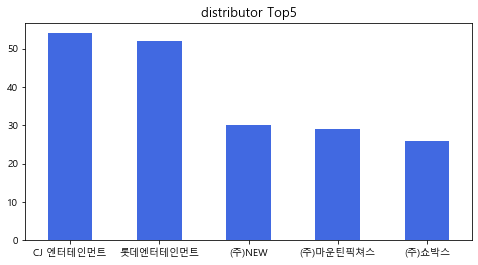

In [13]:
#1. 어느 배급사가 영화를 가장 많이 냈는가?


plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.title("distributor Top5",fontsize=13)
movie_distributor.plot.bar(color='royalblue',figsize=(8,4), rot=0);


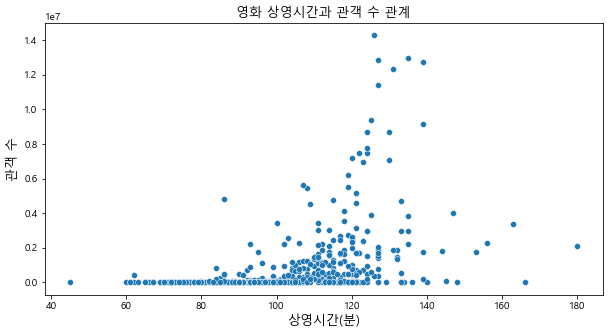

In [14]:
#2.영화상영시간과 관객 수의 관계


plt.figure(figsize=(10,5))
plt.title('영화 상영시간과 관객 수 관계', fontsize = 13)
plt.xlabel('상영시간(분)', fontsize = 13)
plt.ylabel('관객 수', fontsize = 13)
sns.scatterplot( data=movie_train, x='time', y='box_off_num');

In [15]:
movie_sr = movie_train['screening_rat'].value_counts().sort_values()
movie_sr

전체 관람가       92
12세 관람가     102
15세 관람가     202
청소년 관람불가    204
Name: screening_rat, dtype: int64

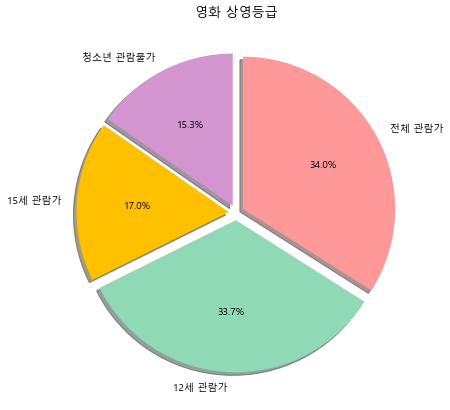

In [16]:
# 영화 상영등급 비율

plt.figure(figsize=(10,7))
plt.title('영화 상영등급', fontsize = 13)
labels = ['청소년 관람불가', '15세 관람가','12세 관람가','전체 관람가']
colors = ['#d395d0', '#ffc000', '#8fd9b6', '#ff9999']
explode = [0.05, 0.05, 0.05, 0.05]
plt.pie(movie_sr, labels=labels, startangle=90, autopct='%1.1f%%',
       colors=colors,shadow=True, explode=explode);

In [17]:
movie_train['year'] = movie_train['release_time'].apply(lambda x : x.split("-")[0])
movie_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,year
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398,2012
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501,2015
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083,2013
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866,2012
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387,2010


In [18]:
movie_train.groupby('year').mean()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
year,,,,,,
2010,103.044444,489954.890741,0.644444,199.233333,4.388889,5.416582e+05
2011,101.600000,487726.002083,0.612500,133.637500,3.737500,6.288671e+05
2012,101.295455,391948.229167,1.011364,136.579545,3.465909,9.457252e+05
2013,101.505263,343786.224561,0.863158,114.284211,3.800000,1.007358e+06
2014,98.645669,376068.879265,0.826772,154.393701,3.543307,5.938845e+05
2015,100.258333,713280.643194,1.191667,163.041667,3.450000,5.958692e+05


In [19]:
movie_train.groupby('year').count()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
year,,,,,,,,,,,,
2010,90,90,90,90,90,90,90,90,90,90,90,90
2011,80,80,80,80,80,80,80,80,80,80,80,80
2012,88,88,88,88,88,88,88,88,88,88,88,88
2013,95,95,95,95,95,95,95,95,95,95,95,95
2014,127,127,127,127,127,127,127,127,127,127,127,127
2015,120,120,120,120,120,120,120,120,120,120,120,120


In [20]:
movie_train.drop('mean_num',axis=1, inplace=True)

KeyError: "['mean_num'] not found in axis"

In [ ]:
movie_train.head()

In [ ]:
data = movie_train.groupby(['year']).agg( 배급수= ('year','count') )
data

In [ ]:
#연도별 영화 배급 수

#plt.title('연도별 영화 배급 수 ', fontsize = 13)
data.plot.bar(color='royalblue',figsize=(8,4), rot=0);

In [ ]:
mean = movie_train.groupby('year').mean()
mean

In [ ]:
#연도 별 관객 수 추이
mean = movie_train.groupby('year').mean()

plt.title('연도 별 관객 수 추이', fontsize = 13)
plt.xlabel("year")
plt.ylabel("box_off_num")
mean['box_off_num'].plot(color = 'r',figsize=(8, 4), marker='o', markersize=5, grid=True)



#이거 아님
#sns.lineplot(data=movie_train, x='year',y='box_off_num',ci=None); 

In [ ]:
movie_train.info()

In [ ]:
#release_time의 type은 object이므로 datetime 변수로 추가
movie_train['release_time2'] = pd.to_datetime(movie_train['release_time'])

#확인하기
movie_train.info()

In [ ]:
# type은 달라 졌지만 값은 달라지지 않는 것을 알 수 있다.
movie_train[['release_time','release_time2']]

In [ ]:
movie_train['month'] = movie_train['release_time2'].dt.month


In [ ]:
movie_train.head()

In [21]:
movie_month = movie_train.groupby(['month']).agg( 월 = ('month','count') )
movie_month

KeyError: 'month'

In [22]:
movie_month.plot.bar(color='royalblue',figsize=(8,4), rot=0);
plt.grid(True, axis='y', alpha=0.4)

NameError: name 'movie_month' is not defined

In [23]:
#가설1: 12월에 개봉하는 영화 장르는 멜로/ 로맨스의 비중이 높을것 같다.

movie_12 = movie_train.query('month==12')
movie_12_genre = movie_12['genre'].value_counts()
movie_12_genre

UndefinedVariableError: name 'month' is not defined

NameError: name 'movie_12_genre' is not defined

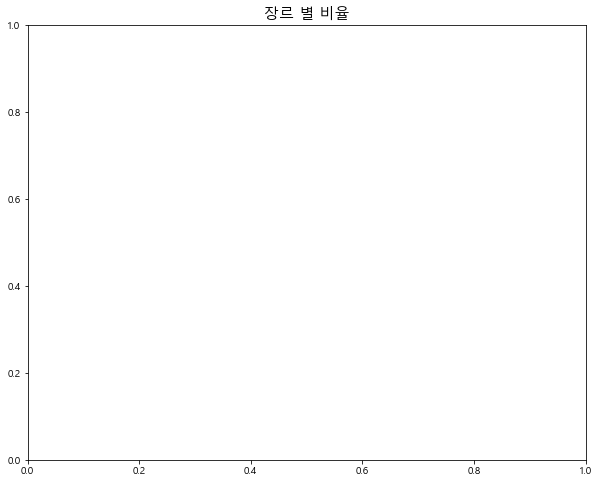

In [24]:
plt.figure(figsize=(10,8))
labels = ['드라마','다큐멘터리','멜로/로맨스','코미디','느와르','애니메이션','미스터리','SF','공포']
explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]
plt.title('장르 별 비율', fontsize=15)
plt.pie(movie_12_genre, labels=labels, autopct='%1.1f%%', startangle=270, explode=explode, textprops={'size':12});

#plt.legend(movie_12_genre.index, loc='right')

In [ ]:
movie_train['director'].value_counts()

In [ ]:
movie_train.query('director == "홍상수"')

In [25]:
#가설2 : 관객수가 많아서 영화를 많이 배출한걸까?

mv = movie_train.query('director == "홍상수"')[['year','title','box_off_num']].sort_values(by='year')
mv

,year,title,box_off_num
19,2010,하하하,57029
523,2010,옥희의 영화,37122
115,2011,북촌방향,46212
331,2012,다른나라에서,31101
506,2013,우리 선희,69122
15,2014,자유의 언덕,39317
164,2015,지금은맞고그때는틀리다,80734


In [26]:
mv.describe()

,box_off_num
count,7.000000
mean,51519.571429
std,18234.414887
min,31101.000000
25%,38219.500000
50%,46212.000000
75%,63075.500000
max,80734.000000


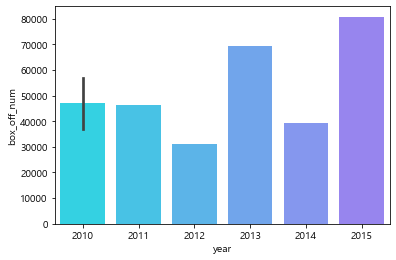

In [27]:
#bar 색상 지정 위해
palette = sns.color_palette('cool', 10)

sns.barplot(data=mv, x='year', y='box_off_num', palette=palette );

In [28]:
dir_num = movie_train['director'].unique()
dir_num

array(['조병옥', '우민호', '장철수', '구자홍', '신근호', '육상효', '이창재', '임상윤', '정성복',
       '변성현', '조조 히데오', '양병간', '최종태', '한종훈', '윤학렬', '홍상수', '강형철', '린슈유',
       '부지영', '이재용', '안국진', '동지견', '권칠인', '김재한', '손승웅', '류훈', '김철한',
       '한상희', '장진', '김규민', '최윤석', '김관철', '황인호', '장희선', '김조광수', '김기덕',
       '오멸', '전계수', '최원섭', '민규동', '진승현', '도창훈', '류승완', '전수일', '신연식',
       '하기호', '최호', '방형우', '박용집', '정범식', '김상철', '배성상', '남기웅', '김기영',
       '곽경택', '김성호', '문인수', '최용석', '이지형', '이종필', '손영성', '정기훈', '김인식',
       '김진민', '이영미', '김희정', '이정범', '손석', '정우철', '박재식', '전형준', '김상석',
       '에밀리오 에스테베즈', '김상만', '김태용', '신수원', '정연식', '지민', '한동호', '손영국',
       '김동명', '김대우', '송해성', '방현준', '소재영', '최시형', '엄태화', '연상호', '김동빈',
       '김진무', '조근현', '한재림', '임흥순', '김휘', '전재홍', '신재영', '김경만', '경순',
       '타케 마사하루', '신태라', '배창호', '윤종빈', '배광수', '김성수', '박진표', '권혁만', '심형래',
       '오인천', '장희철', '김병준', '양우석', '김덕수', '이재규', '이창규', '구수환', '허은희',
       '김석윤', '고석진', '최경석', '이해준', '하마구치 류스케', '오기환', '홍재희', '조원희', '장훈',
       '정익환', '박

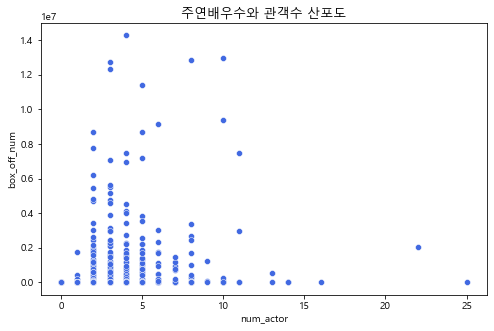

In [29]:
# 주연배우수와 관객수 관계는?

plt.figure(figsize=(8,5))
plt.title('주연배우수와 관객수 산포도', fontsize = 13)
sns.scatterplot( data=movie_train, x='num_actor', y='box_off_num', color='royalblue');

In [30]:
movie_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [31]:
movie_test.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    136
dir_prev_num        0
num_staff           0
num_actor           0
dtype: int64

In [32]:
movie_test['dir_prev_bfnum'] =movie_test['dir_prev_bfnum'].fillna(0)

In [33]:
movie_test.isna().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
dtype: int64

In [34]:
movie_test.query('director == "이정호"')

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
11,베스트셀러,시너지,미스터리,2010-04-15,117,15세 관람가,이정호,550284.0,1,319,1
109,굿바이 홈런,시네마 달,다큐멘터리,2013-02-14,84,전체 관람가,이정호,0.0,0,3,0
166,방황하는 칼날,CJ 엔터테인먼트,공포,2014-04-10,122,청소년 관람불가,이정호,980977.0,3,456,2


In [ ]:
# t-test